## Section 1. Import Libraries



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

import warnings

In [3]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

## Section 2. Load Dataset

In [4]:
# TO DO: Read CSV file
df = pd.read_csv('AirlineSatisfaction.csv')
# TO DO: Display first few rows of the dataframe
print(df.head())

   Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              4   
1                                  1                       3            

## Section 3. EDA

Shape of the dataframe: (25976, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location     

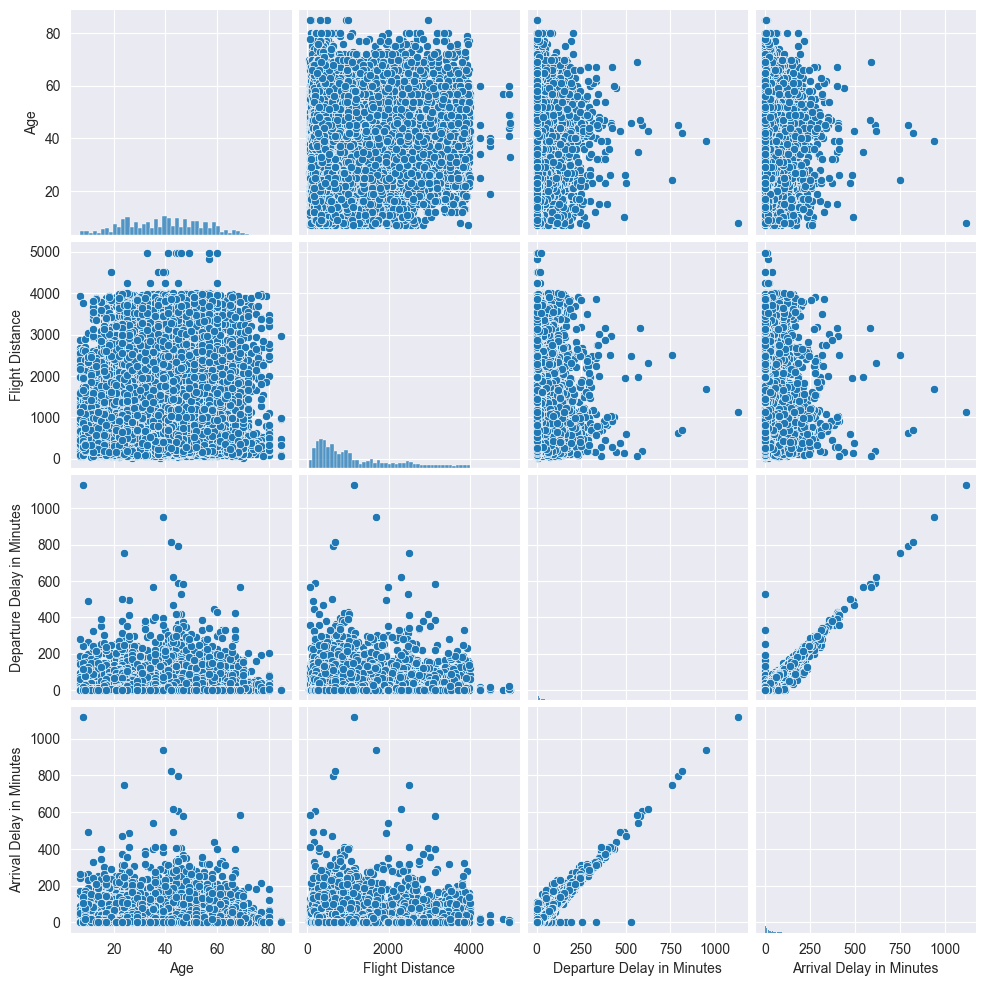

In [5]:
# TODO: Print the shape of the data

print("Shape of the dataframe:", df.shape)

# TODO: Print the information about the dataframe

print(df.info())

# TODO Display the summary statistics of the dataframe
print(df.describe())
# Removing unnecesary columns

df=df.drop(['Unnamed: 0','id','Gender', 'Customer Type','Type of Travel', 'Class', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness','satisfaction'],axis=1)

# TODO: Replace any NaN values in the dataframe with 0
df.fillna(0, inplace=True)
# TODO: Print the number of NaN values in each column of the dataframe
print("Number of NaN values in each column:")
print(df.isnull().sum())
# TO DO: Create a pairplot using Seaborn library
sns.pairplot(df)

## Section 5. Model Building | Training

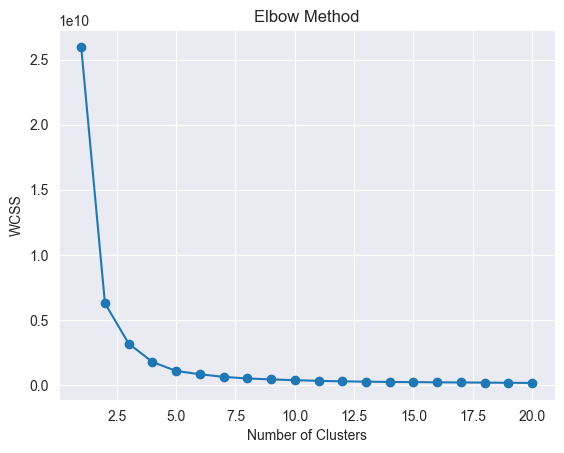

In [6]:
# TO DO: Implement the elbow method to determine the optimal number of clusters
wcss = [] # within-cluster sum of squares
# TO DO: Create a KMeans model for each number of clusters from 1 to 20
# TO DO: Fit the KMeans model to the data and append the within-cluster sum of squares (WCSS) to a list
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=0)

    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# TO DO: Plot the WCSS for each number of clusters
plt.plot(range(1, 21), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

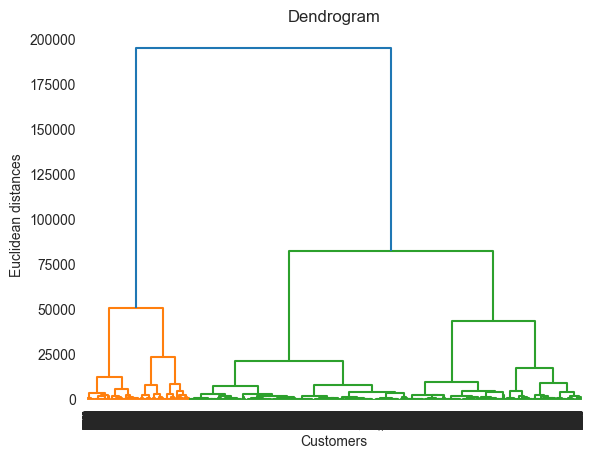

In [7]:
# TO DO: Create a dendrogram using hierarchical clustering
# TO DO: Use the ward method to calculate linkage
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))
# TO DO: Plot the dendrogram
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## Section 6. K Means Clustering

In [8]:
# TO DO: Create a KMeans model with the best number of clusters
# TO DO: Fit the KMeans model to the data and assign the resulting
best_num_clusters = 2
kmeans = KMeans(n_clusters=best_num_clusters, random_state=0)


df['cluster_label'] = kmeans.fit_predict(df)

# cluster labels to a new column in the dataframe
print(df.head())



   Age  Flight Distance  Departure Delay in Minutes  Arrival Delay in Minutes  \
0   52              160                          50                      44.0   
1   36             2863                           0                       0.0   
2   20              192                           0                       0.0   
3   44             3377                           0                       6.0   
4   49             1182                           0                      20.0   

   cluster_label  
0              0  
1              1  
2              0  
3              1  
4              0  


## Section 7. Agglomerative Clustering

In [9]:
# TO DO: Create an Agglomerative Clustering model with the best number of clusters
# using the Euclidean distance metric and ward linkage
agg_clustering = AgglomerativeClustering(n_clusters=best_num_clusters, affinity='euclidean', linkage='ward')

# TO DO: Fit the Agglomerative Clustering model to the data and assign
# the resulting cluster labels to a new column in the dataframe
df['cluster_label_agg'] = agg_clustering.fit_predict(df)
print(df.head())

   Age  Flight Distance  Departure Delay in Minutes  Arrival Delay in Minutes  \
0   52              160                          50                      44.0   
1   36             2863                           0                       0.0   
2   20              192                           0                       0.0   
3   44             3377                           0                       6.0   
4   49             1182                           0                      20.0   

   cluster_label  cluster_label_agg  
0              0                  0  
1              1                  1  
2              0                  0  
3              1                  1  
4              0                  0  


## Section 8. Clusters Visualization

In [10]:
# TO DO: Remove outliers from the dataframe to improve visualization
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(df.head())

   Age  Flight Distance  Departure Delay in Minutes  Arrival Delay in Minutes  \
2   20              192                           0                       0.0   
4   49             1182                           0                      20.0   
5   16              311                           0                       0.0   
8   47              556                           1                       0.0   
9   46             1744                          28                      14.0   

   cluster_label  cluster_label_agg  
2              0                  0  
4              0                  0  
5              0                  0  
8              0                  0  
9              1                  0  


ValueError: 'c' argument has 1 elements, which is inconsistent with 'x' and 'y' with size 17227.

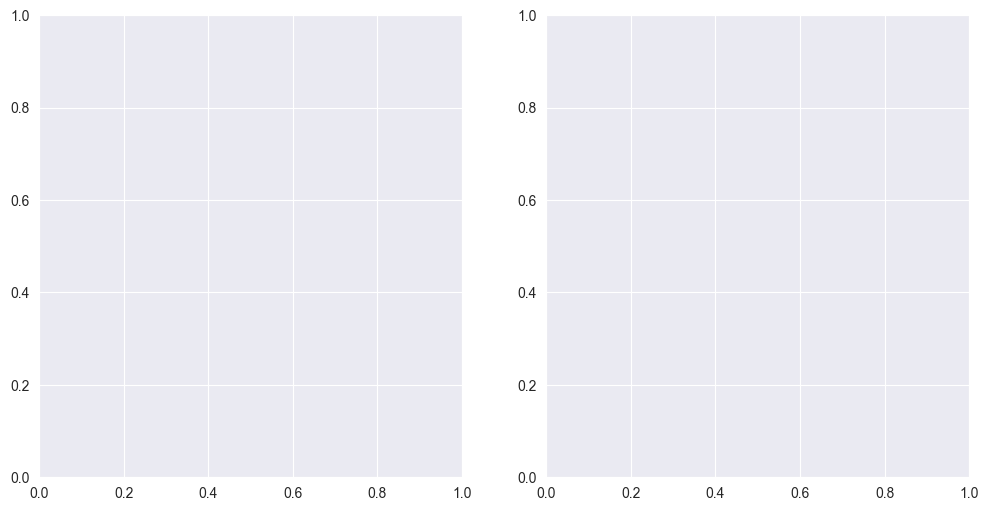

In [11]:
# TO DO: Create a scatter plot with subplots for each clustering method
# TO DO: Plot the data points for each cluster in a different color and label the clusters accordingly

fig, axes = plt.subplots(1, 2, figsize=(12, 6))#Create subplots for each clustering method

#Scatter plot for KMeans clustering
axes[0].scatter(df['Departure Delay in Minutes'], df['Arrival Delay in Minutes'], c=best_num_clusters)
axes[0].set_title('KMeans Clustering')
axes[0].set_xlabel('Departure Delay in Minutes')
axes[0].set_ylabel('Arrival Delay in Minutes')

# Scatter plot for Agglomerative clustering
axes[1].scatter(df['Departure Delay in Minutes'], df['Arrival Delay in Minutes'], c=best_num_clusters)
axes[1].set_title('Agglomerative Clustering')
axes[1].set_xlabel('Departure Delay in Minutes')
axes[1].set_ylabel('Arrival Delay in Minutes')

# Add legend for cluster labels
axes[0].legend()
axes[1].legend()

#Show the plot
plt.tight_layout()
plt.show()